In [9]:
import warnings
import pandas as pd
from pycaret.classification import *

seed = 1
warnings.filterwarnings("ignore")

In [10]:
df_training = pd.read_parquet("training.parquet")

In [11]:
df_training = df_training.sample(n=1000_000, random_state=seed)
df_training.label.mean()

0.031641

In [12]:
setup_params = {
    "target": "label",
    "numeric_features": list(df_training.columns[1:]),
    "silent": True,
    "fold" : 3,
    "session_id": seed,
    "preprocess": False,
    "data": df_training
}

prep = setup(**setup_params)

,Description,Value
0,session_id,1
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1000000, 11)"
5,Missing Values,0
6,Numeric Features,10
7,Categorical Features,0
8,Transformed Train Set,"(699999, 10)"
9,Transformed Test Set,"(300001, 10)"


In [13]:
include_models = ["catboost","dt", "svm", "nb"]
best_models = compare_models(
    sort="AUC", 
    include=include_models,
    n_select=len(include_models)
    )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9684,0.7028,0.0026,0.4040,0.0052,0.0048,0.0304,37.8267
nb,Naive Bayes,0.9151,0.6736,0.1612,0.0802,0.1071,0.0678,0.0723,1.0333
dt,Decision Tree Classifier,0.9370,0.5408,0.1177,0.0958,0.1056,0.0734,0.0738,2.1267
svm,SVM - Linear Kernel,0.9304,0.0000,0.0778,0.0332,0.0324,0.0142,0.0175,12.1067


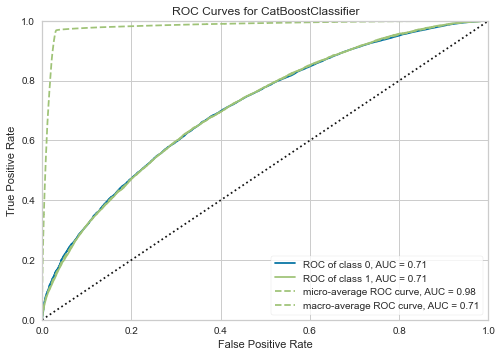

In [14]:
plot_model(estimator=best_models[0], plot="auc")

In [15]:
#plot_model(estimator=best_models[0], plot="threshold")

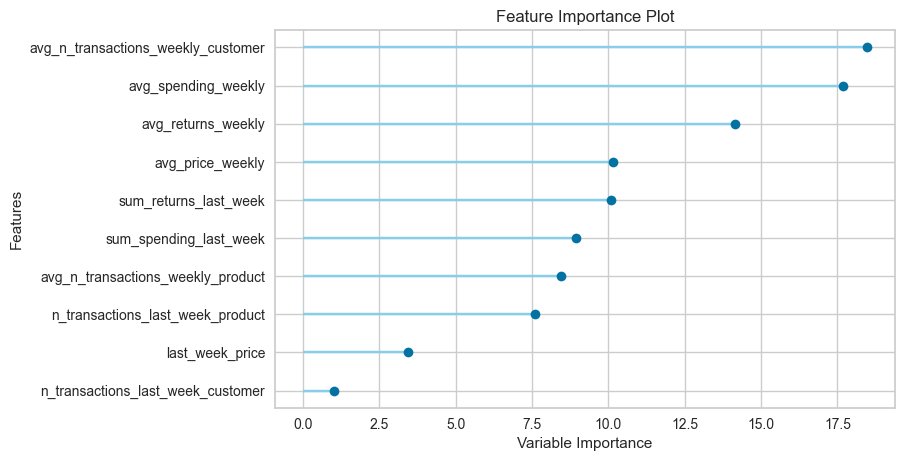

In [21]:
plot_model(estimator=best_models[0], plot="feature_all")